In [1]:
import sys
sys.path.insert(0, 'net/')

from net import net
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
fc = net(.1)
# height,width,depth
fc.add_layer('input',shape=(2,1))
fc.add_layer('fc',num_neurons=3,activation='relu')
fc.add_layer('output',num_neurons=2,activation='softmax')

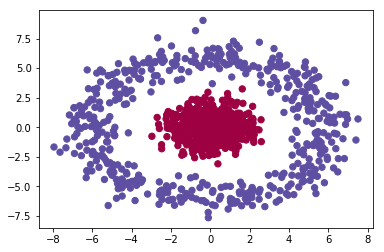

In [3]:
steps = 1000
h = 0
k = 0
r = 1
labels = np.zeros((steps))
Y = np.zeros((steps,2))
X = np.zeros((steps,2))
counter = 0
theta = np.arange(0,2*3.14,2*3.14/500)

for i in range(2): 
    for t in theta:
        X_ = h + r*math.cos(t) + np.random.randn()*.8
        Y_ = k - r*math.sin(t) + np.random.randn()*.8
        X[counter] = np.array([X_,Y_])
        labels[counter] = i
        Y[counter,i] = 1
        counter +=1
    r += 5

plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap=plt.cm.Spectral)
plt.show()

In [4]:
counter = 0
accuracy = 0
for _ in range(10):
    for i in range(0,len(X)):
        predictions = fc.forward(X[i])
        index = np.argmax(predictions)

        if Y[i][index] == 1:
            accuracy += 1

        gradient = fc.cross_entropy_gradient(predictions,Y[i])
        fc.backward(gradient)

print("Accuracy:",accuracy/float(10*len(X)))

layers/fully_connected_layer.py:44: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.weights == None:
layers/output_layer.py:44: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.weights == None:


Accuracy: 0.9875
